# **Install Required Libraries**

In [1]:
#Import Full Packages
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm

#Import Packages for Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

#Import Packages for Shuffling Data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Import Packages for Our Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.preprocessing import LabelEncoder

#Import Packages for Estimators
from tensorflow.keras.metrics import Recall, Precision
from sklearn import metrics
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'cv2'

In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# **Import the images and load them in the list**

In [ ]:
X_train = []
Y_train = []

img_size = 150

# The dataset was already split into Training and Testing so we merge them first
for i in labels:
  path = os.path.join("C:/Users/iwhatl/Downloads/small_set/Training", i)
  for img in tqdm(os.listdir(path)):
    image = cv2.imread(os.path.join(path, img))
    image = cv2.resize(image,(img_size, img_size))
    X_train.append(image);
    Y_train.append(i);

for i in labels:
  path = os.path.join("C:/Users/iwhatl/Downloads/small_set/Testing", i)
  for img in tqdm(os.listdir(path)):
    image = cv2.imread(os.path.join(path, img))
    image = cv2.resize(image,(img_size, img_size))
    X_train.append(image);
    Y_train.append(i);


X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 824.12it/s]


In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=55)

# **Visualise the Data we are working with**

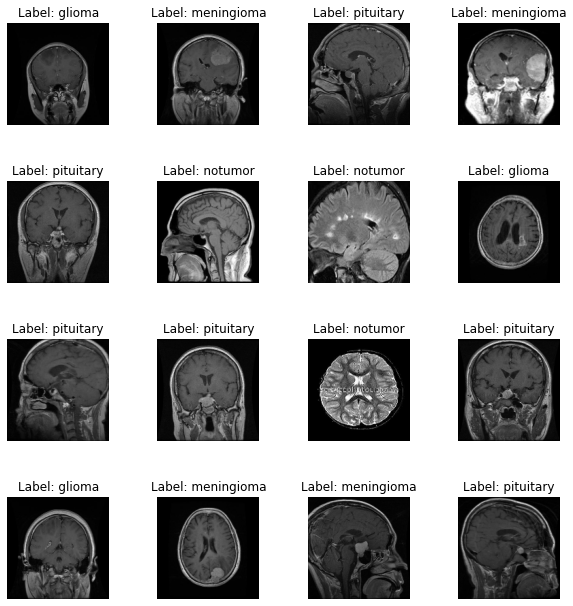

In [ ]:
grid_width = 4
grid_height = 4
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(8, 8)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        ax[i][j].axis('off')
        ax[i][j].set_title('Label: '+Y_train[img_idx])
        ax[i][j].imshow(X_train[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.55)  

# **Split the Data into Training, Testing and Validation set**

In this section, we split the data into training (what we use to actuall train the model), testing(what we use to see if the model runs effectively), and validation ()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=55)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=55)

# We are using a 70-20-10 split

print(X_train.shape)

(5056, 150, 150, 3)


# **Encode the text label into binary reprensation**

In [ ]:
encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)
Y_test_encoded = encoder.fit_transform(Y_test)
Y_valid_encoded = encoder.fit_transform(Y_valid)

Y_train_encoded = to_categorical(Y_train_encoded)
Y_test_encoded = to_categorical(Y_test_encoded)
Y_valid_encoded = to_categorical(Y_valid_encoded)

Y_train_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Binary Classification

This is necessary to do it based on 255 but not on colour because it is in black and white

In [ ]:
X_train_scaled = X_train.astype('float32') / 255
X_test_scaled = X_test.astype('float32') / 255
X_valid_scaled = X_valid.astype('float32') / 255

# **CNN Model Creation**

We chose three layers

We convereted the outbook of the neural netweork into numbers.

We are only doing it on maximum becuase it's black and white.

In [ ]:
model = Sequential()
#First Convolutional layer
model.add(Input(shape=(150,150,3)))
model.add(Conv2D(filters=8, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolutional layer
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolutional layer
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Final Hidden Layers
model.add(Dropout(rate=0.6))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(512))
model.add(Dense(4, activation='softmax'))

# Set the oprtimizer
my_optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=my_optimizer, loss='CategoricalCrossentropy', metrics=['Acc', Recall(), 'Precision'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 148, 148, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 8)        32        
 hNormalization)                                                 
                                                        

## TensorBoard

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "C:/Users/iwhatl/Downloads/my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# **Train the Model**

In [ ]:
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = ModelCheckpoint("brain_model.h5", save_best_only=True)
tensorboard_cb = TensorBoard(run_logdir)

weights = {0: 1.09,
          1: 1.07,
          2: 0.81,
          3: 1.09}

history = model.fit(x=X_train_scaled, y=Y_train_encoded, batch_size=32, 
                    validation_data=(X_valid_scaled, Y_valid_encoded),
                    epochs=50, verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb,tensorboard_cb], class_weight=weights)

Epoch 1/50
158/158 [==============================] - 23s 142ms/step - loss: 2.0775 - Acc: 0.6828 - recall: 0.6784 - precision: 0.6881 - val_loss: 2.3793 - val_Acc: 0.2153 - val_recall: 0.0089 - val_precision: 0.0746
Epoch 2/50
158/158 [==============================] - 25s 158ms/step - loss: 0.8234 - Acc: 0.8135 - recall: 0.8095 - precision: 0.8168 - val_loss: 1.6076 - val_Acc: 0.2954 - val_recall: 0.2794 - val_precision: 0.3060
Epoch 3/50
158/158 [==============================] - 25s 160ms/step - loss: 0.5697 - Acc: 0.8394 - recall: 0.8354 - precision: 0.8433 - val_loss: 0.5895 - val_Acc: 0.7687 - val_recall: 0.7100 - val_precision: 0.8143
Epoch 4/50
158/158 [==============================] - 25s 161ms/step - loss: 0.4457 - Acc: 0.8643 - recall: 0.8604 - precision: 0.8698 - val_loss: 0.4039 - val_Acc: 0.8665 - val_recall: 0.8416 - val_precision: 0.8776
Epoch 5/50
158/158 [==============================] - 25s 158ms/step - loss: 0.3402 - Acc: 0.8817 - recall: 0.8766 - precision: 0.88

In [ ]:
model.save("C:/Users/iwhatl/Downloads/Econ 420 Final/my_model") #Save the model so we can use it

INFO:tensorflow:Assets written to: C:/Users/iwhatl/Downloads/Econ 420 Final/my_model\assets


INFO:tensorflow:Assets written to: C:/Users/iwhatl/Downloads/Econ 420 Final/my_model\assets


In [ ]:
from keras.models import load_model
model = load_model("C:/Users/iwhatl/Downloads/Econ 420 Final/my_model")

# **Test the model on the Test set**

In [ ]:
predictions = model.predict(X_test_scaled)
p = np.argmax(predictions, axis=1)
label = np.argmax(Y_test_encoded, axis=1)
print(classification_report(label, p))

44/44 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       331
           1       0.89      0.90      0.90       325
           2       0.98      0.98      0.98       387
           3       0.96      0.97      0.97       362

    accuracy                           0.95      1405
   macro avg       0.94      0.94      0.94      1405
weighted avg       0.95      0.95      0.95      1405



## Show the Confusion matrix for the Test Set

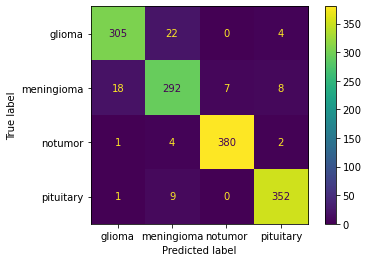

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

np.argmax(label)
e = encoder.inverse_transform(label)

np.argmax(p)
d = encoder.inverse_transform(p)

m = confusion_matrix(e,d, labels=labels)
n = m/m.sum(axis=1)

g = ConfusionMatrixDisplay(m, display_labels=labels)
g.plot()
plt.show()

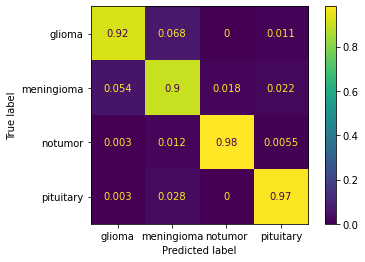

In [ ]:
g = ConfusionMatrixDisplay(n, display_labels=labels)
g.plot()
plt.show()

## Learning Curves, Validation Set and Overfitting

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

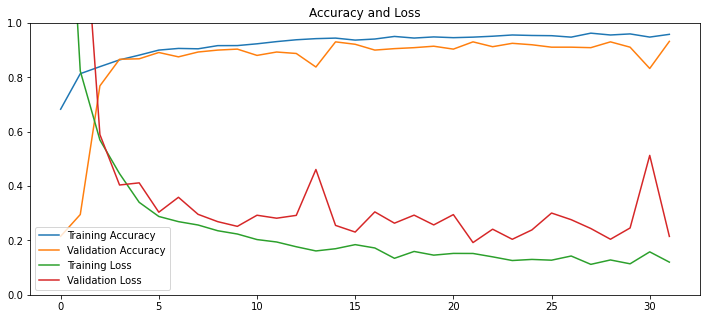

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(122)

plt.subplot(1,1,1)
plt.plot(history.history['Acc'])
plt.plot(history.history['val_Acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Accuracy', 'Validation Accuracy','Training Loss','Validation Loss'])
plt.title('Accuracy and Loss')
plt.ylim([0,1])

plt.show()

In [ ]:
predictions_valid = model.predict(X_valid_scaled)
p = np.argmax(predictions_valid, axis=1)
label = np.argmax(Y_valid_encoded, axis=1)
print(classification_report(label, p))

18/18 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       122
           1       0.85      0.85      0.85       122
           2       0.96      0.98      0.97       167
           3       0.97      0.97      0.97       151

    accuracy                           0.93       562
   macro avg       0.93      0.92      0.92       562
weighted avg       0.93      0.93      0.93       562



In [ ]:
print(history.history['val_Acc'][31],history.history['val_loss'][31])


0.9323843121528625 0.21483305096626282


# History

In [ ]:
history.history

{'loss': [2.07751727104187,
  0.8233567476272583,
  0.5697096586227417,
  0.4457414448261261,
  0.3402332365512848,
  0.28819358348846436,
  0.26917070150375366,
  0.2567906975746155,
  0.23574385046958923,
  0.2236514687538147,
  0.20321804285049438,
  0.19431379437446594,
  0.17676998674869537,
  0.16137433052062988,
  0.1695495843887329,
  0.184549942612648,
  0.17229588329792023,
  0.1342766135931015,
  0.1594676673412323,
  0.14592938125133514,
  0.15230779349803925,
  0.1520690619945526,
  0.13963375985622406,
  0.12612199783325195,
  0.13016290962696075,
  0.1273752599954605,
  0.14270998537540436,
  0.11203210800886154,
  0.1281861960887909,
  0.11403539031744003,
  0.15797895193099976,
  0.12016212940216064],
 'Acc': [0.6827531456947327,
  0.8134889006614685,
  0.8393987417221069,
  0.8643196225166321,
  0.8817246556282043,
  0.9003164768218994,
  0.9064477682113647,
  0.905063271522522,
  0.9167326092720032,
  0.9169303774833679,
  0.9234572649002075,
  0.9315664768218994,
  

In [ ]:
saved_history = {'loss': [2.07751727104187,
  0.8233567476272583,
  0.5697096586227417,
  0.4457414448261261,
  0.3402332365512848,
  0.28819358348846436,
  0.26917070150375366,
  0.2567906975746155,
  0.23574385046958923,
  0.2236514687538147,
  0.20321804285049438,
  0.19431379437446594,
  0.17676998674869537,
  0.16137433052062988,
  0.1695495843887329,
  0.184549942612648,
  0.17229588329792023,
  0.1342766135931015,
  0.1594676673412323,
  0.14592938125133514,
  0.15230779349803925,
  0.1520690619945526,
  0.13963375985622406,
  0.12612199783325195,
  0.13016290962696075,
  0.1273752599954605,
  0.14270998537540436,
  0.11203210800886154,
  0.1281861960887909,
  0.11403539031744003,
  0.15797895193099976,
  0.12016212940216064],
 'Acc': [0.6827531456947327,
  0.8134889006614685,
  0.8393987417221069,
  0.8643196225166321,
  0.8817246556282043,
  0.9003164768218994,
  0.9064477682113647,
  0.905063271522522,
  0.9167326092720032,
  0.9169303774833679,
  0.9234572649002075,
  0.9315664768218994,
  0.9382911324501038,
  0.9424446225166321,
  0.9444224834442139,
  0.9371044039726257,
  0.9410601258277893,
  0.9505537748336792,
  0.9446202516555786,
  0.9487737417221069,
  0.9460047483444214,
  0.9479826092720032,
  0.951344907283783,
  0.9558939933776855,
  0.9541139006614685,
  0.9533227682113647,
  0.9479826092720032,
  0.9626186490058899,
  0.9558939933776855,
  0.9598496556282043,
  0.9481803774833679,
  0.9582673907279968],
 'recall': [0.6784018874168396,
  0.8095332384109497,
  0.8354430198669434,
  0.8603639006614685,
  0.8765822649002075,
  0.8939873576164246,
  0.9005142450332642,
  0.9001186490058899,
  0.9115902185440063,
  0.9143591523170471,
  0.920688271522522,
  0.9287974834442139,
  0.9339398741722107,
  0.9390822649002075,
  0.9398733973503113,
  0.9347310066223145,
  0.9378955960273743,
  0.9487737417221069,
  0.941257894039154,
  0.9469936490058899,
  0.9444224834442139,
  0.9462025165557861,
  0.9495648741722107,
  0.9539161324501038,
  0.9521360993385315,
  0.9521360993385315,
  0.9465981125831604,
  0.9614319801330566,
  0.9539161324501038,
  0.9588607549667358,
  0.9465981125831604,
  0.956882894039154],
 'precision': [0.6880642175674438,
  0.8168030381202698,
  0.8432821035385132,
  0.8698260188102722,
  0.8881763815879822,
  0.905811607837677,
  0.9116940498352051,
  0.9112935662269592,
  0.9214314222335815,
  0.9222022891044617,
  0.9263681769371033,
  0.9358310103416443,
  0.9419509172439575,
  0.9460051655769348,
  0.9473684430122375,
  0.941246747970581,
  0.943869411945343,
  0.9546268582344055,
  0.9476304054260254,
  0.9518886804580688,
  0.9472326636314392,
  0.949394702911377,
  0.9535253047943115,
  0.9577045440673828,
  0.9555379152297974,
  0.9557276368141174,
  0.9497916102409363,
  0.9633373022079468,
  0.956944465637207,
  0.9605706334114075,
  0.9507349729537964,
  0.9597302079200745],
 'val_loss': [2.3792829513549805,
  1.607643485069275,
  0.5894734263420105,
  0.403939813375473,
  0.41186046600341797,
  0.3038543462753296,
  0.35881003737449646,
  0.29602572321891785,
  0.269125372171402,
  0.2518131136894226,
  0.2927362322807312,
  0.2818100154399872,
  0.29221490025520325,
  0.46103498339653015,
  0.25532761216163635,
  0.23084232211112976,
  0.3050304651260376,
  0.263504296541214,
  0.2930838465690613,
  0.2571333348751068,
  0.2950476109981537,
  0.19217990338802338,
  0.24136075377464294,
  0.20425783097743988,
  0.23873469233512878,
  0.30081018805503845,
  0.2763899266719818,
  0.24386999011039734,
  0.20438072085380554,
  0.24587589502334595,
  0.5129117965698242,
  0.21483305096626282],
 'val_Acc': [0.2153024971485138,
  0.29537367820739746,
  0.7686832547187805,
  0.8665480613708496,
  0.8683273792266846,
  0.891459047794342,
  0.8754448294639587,
  0.8932384252548218,
  0.900355875492096,
  0.9039145708084106,
  0.8807829022407532,
  0.8932384252548218,
  0.8879003524780273,
  0.8380783200263977,
  0.9306049942970276,
  0.9217081665992737,
  0.900355875492096,
  0.9056939482688904,
  0.9092526435852051,
  0.9145907759666443,
  0.9039145708084106,
  0.9306049942970276,
  0.9128113985061646,
  0.9252669215202332,
  0.9199288487434387,
  0.9110320210456848,
  0.9110320210456848,
  0.9092526435852051,
  0.9306049942970276,
  0.9110320210456848,
  0.8327401876449585,
  0.9323843121528625],
 'val_recall': [0.008896796964108944,
  0.2793594300746918,
  0.709964394569397,
  0.8416370153427124,
  0.8576512336730957,
  0.8807829022407532,
  0.873665452003479,
  0.8825622797012329,
  0.891459047794342,
  0.8985764980316162,
  0.8683273792266846,
  0.8861209750175476,
  0.8825622797012329,
  0.8345195651054382,
  0.9288256168365479,
  0.9199288487434387,
  0.891459047794342,
  0.9039145708084106,
  0.900355875492096,
  0.9128113985061646,
  0.8967971801757812,
  0.9270462393760681,
  0.9110320210456848,
  0.9217081665992737,
  0.9163700938224792,
  0.9074733257293701,
  0.9074733257293701,
  0.9056939482688904,
  0.9270462393760681,
  0.9092526435852051,
  0.8309608697891235,
  0.9270462393760681],
 'val_precision': [0.0746268630027771,
  0.30604287981987,
  0.8142856955528259,
  0.8775510191917419,
  0.8827838897705078,
  0.89673912525177,
  0.8862816095352173,
  0.9001814723014832,
  0.9125683307647705,
  0.9132007360458374,
  0.8872727155685425,
  0.9005424976348877,
  0.8985507488250732,
  0.8420107960700989,
  0.9338103532791138,
  0.9232142567634583,
  0.9043321013450623,
  0.9087656736373901,
  0.9100719690322876,
  0.9193548560142517,
  0.908108115196228,
  0.9336917400360107,
  0.9159212708473206,
  0.9283154010772705,
  0.9229390621185303,
  0.9156193733215332,
  0.9107142686843872,
  0.9121863842010498,
  0.9303571581840515,
  0.9125000238418579,
  0.8384200930595398,
  0.9336917400360107]}

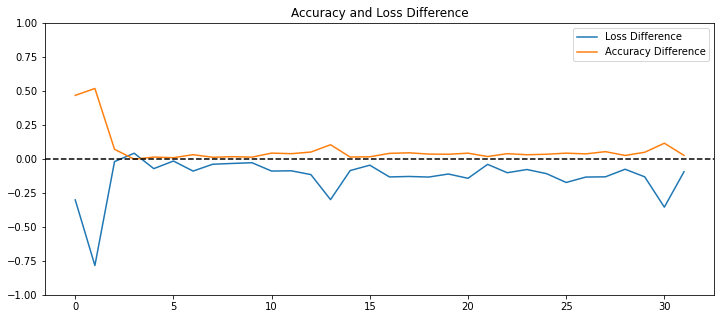

In [ ]:
import numpy as np

mn = (saved_history)

ac= np.asarray(mn.get("loss")) - np.asarray(mn.get("val_loss"))
ac_acc = np.asarray(mn.get("Acc")) - np.asarray(mn.get("val_Acc"))

plt.figure(figsize=(12,5))
plt.subplot(122)

plt.subplot(1,1,1)
plt.plot(ac)
plt.plot(ac_acc)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.legend(['Loss Difference',"Accuracy Difference"])
plt.title('Accuracy and Loss Difference')
plt.ylim([-1,1])

plt.show()

In [ ]:
print('The mean difference between training loss and validation loss is',ac.mean())
print('The mean difference between training accuracy and validation accuracy is',ac_acc.mean())

The mean difference between training loss and validation loss is -0.12939280224964023
The mean difference between training accuracy and validation accuracy is 0.06498332787305117


# Test out the Model for Yourself

In [1]:
plt.imshow(X_train_scaled[150], interpolation='nearest')
plt.show()

NameError: ignored

In [ ]:
n = np.array(X_test_scaled[150])
n = np.expand_dims(n, 0)
model.predict(n)